In [6]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

# import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()


import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
# from prophet import Prophet

In [7]:
df=pd.read_csv('daily-website-visitors.csv')

df.rename(columns = {'Day.Of.Week':'day_of_week'
                    ,'Page.Loads':'page_loads'
                    ,'Unique.Visits':'unique_visits'
                    ,'First.Time.Visits':'first_visits'
                    ,'Returning.Visits':'returning_visits'}, inplace = True)

df=df.replace(',','',regex=True)

df['page_loads']=df['page_loads'].astype(int)
df['unique_visits']=df['unique_visits'].astype(int)
df['first_visits']=df['first_visits'].astype(int)
df['returning_visits']=df['returning_visits'].astype(int)

df

,Row,Day,day_of_week,Date,page_loads,unique_visits,first_visits,returning_visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


### ingenieria de variables

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Row,Day,day_of_week,Date,page_loads,unique_visits,first_visits,returning_visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


In [11]:
df.dtypes

Row                          int64
Day                         object
day_of_week                  int64
Date                datetime64[ns]
page_loads                   int32
unique_visits                int32
first_visits                 int32
returning_visits             int32
dtype: object

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df

,Row,Day,day_of_week,page_loads,unique_visits,first_visits,returning_visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
2020-08-15,2163,Saturday,7,2221,1696,1373,323
2020-08-16,2164,Sunday,1,2724,2037,1686,351
2020-08-17,2165,Monday,2,3456,2638,2181,457


<AxesSubplot:xlabel='Date'>

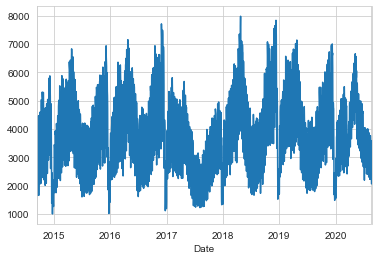

In [14]:
df['page_loads'].plot()

<AxesSubplot:xlabel='page_loads', ylabel='returning_visits'>

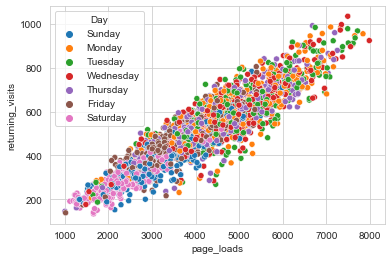

In [15]:
sns.scatterplot(x='page_loads',y ='returning_visits', hue = 'Day', data=df)